# Can We Predict The Star Type

With ML techniques, we can categorize the stars between main sequence stars and giants.

* Tasks you can do:
1. Preprocess the Data
    - Clean the Data (Null values, Errored values)
    - Create Amag column via the equation
    - Create a label column via SpType
    
    
2. Analysis and Predict Star Type
    - Try with Logistic Regression and create a decision boundary
    - Performing deep neural network and create a decision boundary

# 1. Process the Data 

#### Imporing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from IPython.display import Image, display
from PIL import Image

In [2]:
os.getcwd()

'C:\\Users\\bruna\\IronHack\\GitHub\\Project\\Project 6\\Star-Classification'

#### Loading dataset

In [3]:
raw = pd.read_csv('../Star-Classification/Star99999_raw.csv')

#### Exploring dataset

In [4]:
raw.head()

,Unnamed: 0,Vmag,Plx,e_Plx,B-V,SpType
0,0,9.10,3.54,1.39,0.482,F5
1,1,9.27,21.90,3.10,0.999,K3V
2,2,6.61,2.81,0.63,-0.019,B9
3,3,8.06,7.75,0.97,0.370,F0V
4,4,8.55,2.87,1.11,0.902,G8III


#### Columns:

Vmag - Visual Apparent Magnitude of the Star (m)

Plx - Distance Between the Star and the Earth (d)

e_Plx - Standard Error of Plx (Drop the Row if you find the e_Plx is too high!)

B-V - B-V color index. (A hot star has a B-V color index close to 0 or negative, while a cool star has a B-V color index close to 2.0. Other stars are somewhere in between.)

SpType - Stellar classification.

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  99999 non-null  int64 
 1   Vmag        99999 non-null  object
 2   Plx         99999 non-null  object
 3   e_Plx       99999 non-null  object
 4   B-V         99999 non-null  object
 5   SpType      97377 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


# - Data Cleaning

#### Let's change the columns name to better manipulation

In [6]:
raw.rename(columns={'B-V':'B_V'}, inplace = True)

#### converting object type columns to numeric

In [7]:
raw.Vmag = pd.to_numeric(raw.Vmag, downcast='float', errors ='coerce')
raw.Plx = pd.to_numeric(raw.Plx, downcast='float', errors ='coerce')
raw.e_Plx = pd.to_numeric(raw.e_Plx, downcast='float', errors ='coerce')
raw['B_V'] = pd.to_numeric(raw['B_V'], downcast='float', errors ='coerce')

In [8]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  99999 non-null  int64  
 1   Vmag        99998 non-null  float32
 2   Plx         99768 non-null  float32
 3   e_Plx       99768 non-null  float32
 4   B_V         98871 non-null  float32
 5   SpType      97377 non-null  object 
dtypes: float32(4), int64(1), object(1)
memory usage: 3.1+ MB


In [9]:
raw.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,99999.0,49999.000,28867.369,0.00,24999.500,49999.000,74998.500,99998.00
Vmag,99998.0,8.370,1.314,-1.44,7.640,8.440,9.140,14.08
Plx,99768.0,7.212,11.349,-54.95,2.510,4.630,8.410,772.33
e_Plx,99768.0,1.365,1.817,0.38,0.880,1.100,1.390,114.46
B_V,98871.0,0.705,0.490,-0.40,0.348,0.612,1.075,5.46


#### Checking for missing values

In [10]:
raw.isnull().sum()

Unnamed: 0       0
Vmag             1
Plx            231
e_Plx          231
B_V           1128
SpType        2622
dtype: int64

In [11]:
raw.shape

(99999, 6)

In [12]:
np.product(raw.shape)

599994

#### What is the % of the missing data

In [13]:
total_cells = np.product(raw.shape)
total_missing = raw.isnull().sum().sum()
percent_missing = (total_missing/total_cells)* 100

In [14]:
print(f'Missing data equals: {round(percent_missing,2)}%' )

Missing data equals: 0.7%


#### Pourcentage insignificant, so lets drop it those rows

In [15]:
raw_missing_removed = raw.dropna()

In [16]:
raw_missing_removed.shape

(96742, 6)

In [17]:
raw_missing_removed.isnull().sum()

Unnamed: 0    0
Vmag          0
Plx           0
e_Plx         0
B_V           0
SpType        0
dtype: int64

#### How many rows did we dropped?

In [18]:
dropped_rows = raw.shape[0] - raw_missing_removed.shape[0]

In [19]:
print(f'We dropped : {dropped_rows} rows')

We dropped : 3257 rows


#### What is the pourcentage of this amount? 

In [20]:
pourcentage_dropped_rows = ((raw.shape[0] - raw_missing_removed.shape[0])/raw.shape[0])*100

In [21]:
print(f'Dropped rows equals : {round(pourcentage_dropped_rows,2)} %')

Dropped rows equals : 3.26 %


#### Checking for duplicated

In [22]:
raw_missing_removed.duplicated().sum()

0

#### But after dropping so many rows our index must be weird

#### Let's ReIndex it

In [23]:
raw_missing_removed.reset_index(drop=True, inplace = True)

In [24]:
raw_missing_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96742 entries, 0 to 96741
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  96742 non-null  int64  
 1   Vmag        96742 non-null  float32
 2   Plx         96742 non-null  float32
 3   e_Plx       96742 non-null  float32
 4   B_V         96742 non-null  float32
 5   SpType      96742 non-null  object 
dtypes: float32(4), int64(1), object(1)
memory usage: 3.0+ MB


#### Are there any useless columns?

In [25]:
raw_missing_removed.head()

,Unnamed: 0,Vmag,Plx,e_Plx,B_V,SpType
0,0,9.10,3.54,1.39,0.482,F5
1,1,9.27,21.90,3.10,0.999,K3V
2,2,6.61,2.81,0.63,-0.019,B9
3,3,8.06,7.75,0.97,0.370,F0V
4,4,8.55,2.87,1.11,0.902,G8III


In [26]:
raw_missing_removed.tail()

,Unnamed: 0,Vmag,Plx,e_Plx,B_V,SpType
96737,99993,7.92,3.93,1.24,0.133,Am...
96738,99994,8.72,3.07,0.87,0.097,B3
96739,99996,8.08,1.07,0.68,1.094,G5
96740,99997,6.98,2.97,0.76,-0.143,B1.5V
96741,99998,8.51,-1.18,1.34,1.568,K5/M0III


### Unnamed: 0 is a index columns :

but we already have it so let's dropt it


In [27]:
raw_missing_removed.drop('Unnamed: 0', axis = 1, inplace = True)

C:\Users\bruna\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
raw_missing_removed.head()

,Vmag,Plx,e_Plx,B_V,SpType
0,9.10,3.54,1.39,0.482,F5
1,9.27,21.90,3.10,0.999,K3V
2,6.61,2.81,0.63,-0.019,B9
3,8.06,7.75,0.97,0.370,F0V
4,8.55,2.87,1.11,0.902,G8III


# Data Cleaned 

## - Let's Create Amag column via the equation

### Equation asks for log of Plx(d) (which is the distance between the star and the Earth)

### But log of 0 is infinite and we can't use it

So let's not consider theses rows

In [29]:
raw_missing_removed = raw_missing_removed.query('Plx != 0')

In [30]:
raw_missing_removed

,Vmag,Plx,e_Plx,B_V,SpType
0,9.10,3.54,1.39,0.482,F5
1,9.27,21.90,3.10,0.999,K3V
2,6.61,2.81,0.63,-0.019,B9
3,8.06,7.75,0.97,0.370,F0V
4,8.55,2.87,1.11,0.902,G8III
...,...,...,...,...,...
96737,7.92,3.93,1.24,0.133,Am...
96738,8.72,3.07,0.87,0.097,B3
96739,8.08,1.07,0.68,1.094,G5
96740,6.98,2.97,0.76,-0.143,B1.5V


In [31]:
raw_missing_removed.reset_index(drop = True, inplace = True)

In [32]:
raw_missing_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96707 entries, 0 to 96706
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vmag    96707 non-null  float32
 1   Plx     96707 non-null  float32
 2   e_Plx   96707 non-null  float32
 3   B_V     96707 non-null  float32
 4   SpType  96707 non-null  object 
dtypes: float32(4), object(1)
memory usage: 2.2+ MB


### Let's Calculate the Amag Value

#### The Plx is in Milliarcsecond (mas) and we need it in Parsecs (pc)

#### 1 pc = 1 arsecs (arcsecond)
#### So we need to divide the Plx by 1000

In [35]:
df = raw_missing_removed

In [36]:
df['Plx'] = df['Plx'].map(lambda x : x/1000)

In [37]:
df.head()

,Vmag,Plx,e_Plx,B_V,SpType
0,9.10,0.00354,1.39,0.482,F5
1,9.27,0.02190,3.10,0.999,K3V
2,6.61,0.00281,0.63,-0.019,B9
3,8.06,0.00775,0.97,0.370,F0V
4,8.55,0.00287,1.11,0.902,G8III


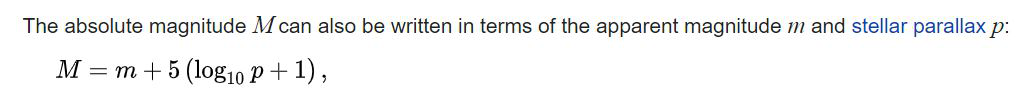

In [38]:
display(Image.open('../Star-Classification/Amag.JPG'))

In [39]:
df['Amag'] = df.Vmag + 5 *(np.log10(df.Plx)+1)

C:\Users\bruna\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
df.describe()

,Vmag,Plx,e_Plx,B_V,Amag
count,96707.000000,96707.000000,96707.000000,96707.000000,93556.000000
mean,8.291762,0.007108,1.264152,0.700663,1.599608
std,1.247954,0.011147,1.156387,0.490001,2.326055
min,-1.440000,-0.035100,0.380000,-0.400000,-13.310000
25%,7.610000,0.002520,0.870000,0.342000,0.263158
50%,8.400000,0.004600,1.080000,0.605000,1.511542
75%,9.070000,0.008270,1.360000,1.072000,3.064660
max,13.610000,0.772330,69.070000,5.460000,15.449015


### Display Star Classification

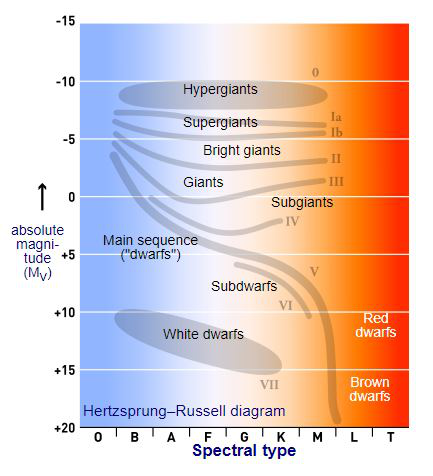

In [41]:
display(Image.open('../Star-Classification/Star_Classification.JPG'))

# - Create a label column via SpType

In [42]:
df.SpType.value_counts()

K0              7321
G5              5358
F8              3827
A0              3804
G0              3754
                ... 
B0IV:evar          1
CVIIe+             1
K2/K3IIIp+.        1
M5e-M9IIIe         1
F3/5V: +A7/9       1
Name: SpType, Length: 3703, dtype: int64

In [43]:
def label_gen_stars(star):
    dwarf = ['D','VI', 'VII', 'V']
    giant = ['III', 'II', 'Ib', 'Ia', 'Ia-O']
    for i in dwarf :
        if i in star:
            return 'Dwarf'
    for i in giant:
        if i in star:
            return 'Giant'
    return 'Other'
    

In [44]:
df['Star_Size'] = df.SpType.apply(label_gen_stars)

In [45]:
df.head()

,Vmag,Plx,e_Plx,B_V,SpType,Amag,Star_Size
0,9.10,0.00354,1.39,0.482,F5,1.845017,Other
1,9.27,0.02190,3.10,0.999,K3V,5.972221,Dwarf
2,6.61,0.00281,0.63,-0.019,B9,-1.146468,Other
3,8.06,0.00775,0.97,0.370,F0V,2.506509,Dwarf
4,8.55,0.00287,1.11,0.902,G8III,0.839410,Giant


In [46]:
df.isnull().sum()

Vmag            0
Plx             0
e_Plx           0
B_V             0
SpType          0
Amag         3151
Star_Size       0
dtype: int64

In [47]:
df.Star_Size.value_counts()

Other    49196
Dwarf    27752
Giant    19759
Name: Star_Size, dtype: int64

## Create a label Star Type Color by B.V

#### Get table from internet

In [48]:
spectral_class = pd.read_html('https://www.enchantedlearning.com/subjects/astronomy/stars/startypes.shtml')

In [49]:
spectral_class = spectral_class[7]

In [50]:
spectral_class.drop('Examples', axis = 1, inplace=True)

#### Renaming columns for better manipulation

In [51]:
spectral_class.rename(columns={'Approximate Surface Temperature':'Approx_Surface_Temperature(K)'}, inplace = True)

In [52]:
spectral_class.rename(columns={'Average Mass (The Sun = 1)':'Avg_Mass'}, inplace = True)

In [53]:
spectral_class.rename(columns={'Average Radius (The Sun = 1)':'Avg_Radius'}, inplace = True)

In [54]:
spectral_class.rename(columns={'Average Luminosity (The Sun = 1)':'Avg_Light'}, inplace = True)

In [55]:
spectral_class.rename(columns={'Main Characteristics':'Main_Charac'}, inplace = True)

In [56]:
spectral_class['Approx_Surface_Temperature(K)'] = spectral_class['Approx_Surface_Temperature(K)'].replace({'K':'', 
                                                                                                                       'over': '+',
                                                                                                                      'under':'-'})
                                                                                                                       

In [57]:
spectral_class["Approx_Surface_Temperature(K)"] = spectral_class["Approx_Surface_Temperature(K)"].str.replace('K','').str.replace('over', '+').str.replace('under','-')
               

In [58]:
spectral_class

,Star Type,Color,Approx_Surface_Temperature(K),Avg_Mass,Avg_Radius,Avg_Light,Main_Charac
0,O,Blue,"+ 25,000",60.0,15.0,1400000,Singly ionized helium lines (H I) either in em...
1,B,Blue,"11,000 - 25,000",18.0,7.0,20000,Neutral helium lines (H II) in absorption.
2,A,Blue,"7,500 - 11,000",3.2,2.5,80,"Hydrogen (H) lines strongest for A0 stars, dec..."
3,F,Blue to White,"6,000 - 7,500",1.7,1.3,6,Ca II absorption. Metallic lines become notice...
4,G,White to Yellow,"5,000 - 6,000",1.1,1.1,1.2,Absorption lines of neutral metallic atoms and...
5,K,Orange to Red,"3,500 - 5,000",0.8,0.9,0.4,"Metallic lines, some blue continuum."
6,M,Red,"- 3,500",0.3,0.4,0.04(very faint),Some molecular bands of titanium oxide.


#### Get the B-V index for better vizu

In [59]:
def get_color_type(x):
    for i in x:
        if i == 'O':
            return -0.33
        elif i == 'B' :
            return -0.3
        elif i =='A':
            return -0.02
        elif i == 'F':
            return 0.3
        elif i == 'G':
            return 0.58
        elif i == 'K':
            return 0.81
        else :
            return 1.4
            
        

In [60]:
spectral_class['B-V'] = spectral_class['Star Type'].apply(get_color_type)

#### Get Color Type in the DataFrame principal

In [61]:
df.loc[df.B_V < -0.3, 'Color_Type'] ='O'
df.loc[(df.B_V >= -0.3 ) & (df.B_V < -0.02) , 'Color_Type'] ='B'
df.loc[(df.B_V >= -0.02) & (df.B_V < 0.3) , 'Color_Type'] ='A'
df.loc[(df.B_V >= 0.3) & (df.B_V < 0.58) , 'Color_Type'] ='F'
df.loc[(df.B_V >= 0.58) & (df.B_V < 0.81) , 'Color_Type'] ='G'
df.loc[(df.B_V >= 0.81) & (df.B_V < 1.4 ) , 'Color_Type'] ='K'
df.loc[df.B_V >= 1.4,  'Color_Type'] ='M'


### Merge the two dataframe to have all information in the DataFeame Principal


#### Change columns name in second df to merge

In [62]:
spectral_class.rename(columns= {'Star Type' : 'Color_Type'}, inplace = True)

In [63]:
stars = pd.merge(df, spectral_class, on = 'Color_Type', how='left')

In [64]:
df.head()

,Vmag,Plx,e_Plx,B_V,SpType,Amag,Star_Size,Color_Type
0,9.10,0.00354,1.39,0.482,F5,1.845017,Other,F
1,9.27,0.02190,3.10,0.999,K3V,5.972221,Dwarf,K
2,6.61,0.00281,0.63,-0.019,B9,-1.146468,Other,A
3,8.06,0.00775,0.97,0.370,F0V,2.506509,Dwarf,F
4,8.55,0.00287,1.11,0.902,G8III,0.839410,Giant,K


In [65]:
stars.head(10)

,Vmag,Plx,e_Plx,B_V,SpType,Amag,Star_Size,Color_Type,Color,Approx_Surface_Temperature(K),Avg_Mass,Avg_Radius,Avg_Light,Main_Charac,B-V
0,9.10,0.00354,1.39,0.482,F5,1.845017,Other,F,Blue to White,"6,000 - 7,500",1.7,1.3,6,Ca II absorption. Metallic lines become notice...,0.30
1,9.27,0.02190,3.10,0.999,K3V,5.972221,Dwarf,K,Orange to Red,"3,500 - 5,000",0.8,0.9,0.4,"Metallic lines, some blue continuum.",0.81
2,6.61,0.00281,0.63,-0.019,B9,-1.146468,Other,A,Blue,"7,500 - 11,000",3.2,2.5,80,"Hydrogen (H) lines strongest for A0 stars, dec...",-0.02
3,8.06,0.00775,0.97,0.370,F0V,2.506509,Dwarf,F,Blue to White,"6,000 - 7,500",1.7,1.3,6,Ca II absorption. Metallic lines become notice...,0.30
4,8.55,0.00287,1.11,0.902,G8III,0.839410,Giant,K,Orange to Red,"3,500 - 5,000",0.8,0.9,0.4,"Metallic lines, some blue continuum.",0.81
5,12.31,0.01880,4.99,1.336,M0V:,8.680790,Dwarf,K,Orange to Red,"3,500 - 5,000",0.8,0.9,0.4,"Metallic lines, some blue continuum.",0.81
6,9.64,0.01774,1.30,0.740,G0,5.884768,Other,G,White to Yellow,"5,000 - 6,000",1.1,1.1,1.2,Absorption lines of neutral metallic atoms and...,0.58
7,9.05,0.00517,1.95,1.102,M6e-M8.5e Tc,2.617453,Other,K,Orange to Red,"3,500 - 5,000",0.8,0.9,0.4,"Metallic lines, some blue continuum.",0.81
8,8.59,0.00481,0.99,1.067,G5,2.000726,Other,K,Orange to Red,"3,500 - 5,000",0.8,0.9,0.4,"Metallic lines, some blue continuum.",0.81
9,8.59,0.01076,1.10,0.489,F6V,3.749062,Dwarf,F,Blue to White,"6,000 - 7,500",1.7,1.3,6,Ca II absorption. Metallic lines become notice...,0.30


In [66]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96707 entries, 0 to 96706
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Vmag                           96707 non-null  float32
 1   Plx                            96707 non-null  float64
 2   e_Plx                          96707 non-null  float32
 3   B_V                            96707 non-null  float32
 4   SpType                         96707 non-null  object 
 5   Amag                           93556 non-null  float64
 6   Star_Size                      96707 non-null  object 
 7   Color_Type                     96707 non-null  object 
 8   Color                          96707 non-null  object 
 9   Approx_Surface_Temperature(K)  96707 non-null  object 
 10  Avg_Mass                       96707 non-null  float64
 11  Avg_Radius                     96707 non-null  float64
 12  Avg_Light                      96707 non-null 

#### Rename the B-V column

In [67]:
stars.rename(columns = {'B-V':'B_V_index'}, inplace = True)

#### Let's check if the stars are correctly speads

<AxesSubplot:xlabel='B_V_index', ylabel='Amag'>

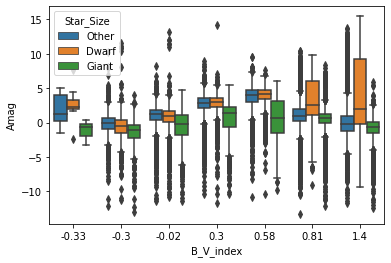

In [68]:
sns.boxplot(data = stars, x = 'B_V_index', y = 'Amag', hue = 'Star_Size')

<AxesSubplot:xlabel='Plx', ylabel='Amag'>

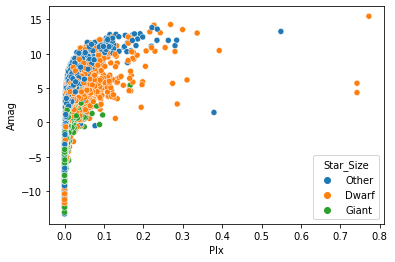

In [75]:
sns.scatterplot(data = stars, x = 'Plx', y = 'Amag', hue = 'Star_Size')

#### Get dummies

#### The SpType columns has too many uniques values and is too big for get dummies

So lets drop it for the moment

In [70]:
df_1 = df.drop('SpType', axis = 1).copy()

In [71]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96707 entries, 0 to 96706
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Vmag        96707 non-null  float32
 1   Plx         96707 non-null  float64
 2   e_Plx       96707 non-null  float32
 3   B_V         96707 non-null  float32
 4   Amag        93556 non-null  float64
 5   Star_Size   96707 non-null  object 
 6   Color_Type  96707 non-null  object 
dtypes: float32(3), float64(2), object(2)
memory usage: 4.1+ MB


In [72]:
df_dummy = pd.get_dummies(data = df_1, columns = ['Star_Size'])

In [73]:
df_dummy

,Vmag,Plx,e_Plx,B_V,Amag,Color_Type,Star_Size_Dwarf,Star_Size_Giant,Star_Size_Other
0,9.10,0.00354,1.39,0.482,1.845017,F,0,0,1
1,9.27,0.02190,3.10,0.999,5.972221,K,1,0,0
2,6.61,0.00281,0.63,-0.019,-1.146468,A,0,0,1
3,8.06,0.00775,0.97,0.370,2.506509,F,1,0,0
4,8.55,0.00287,1.11,0.902,0.839410,K,0,1,0
...,...,...,...,...,...,...,...,...,...
96702,7.92,0.00393,1.24,0.133,0.891963,A,0,0,1
96703,8.72,0.00307,0.87,0.097,1.155692,A,0,0,1
96704,8.08,0.00107,0.68,1.094,-1.773081,K,0,0,1
96705,6.98,0.00297,0.76,-0.143,-0.656218,B,1,0,0


C:\Users\bruna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Star_Size', ylabel='count'>

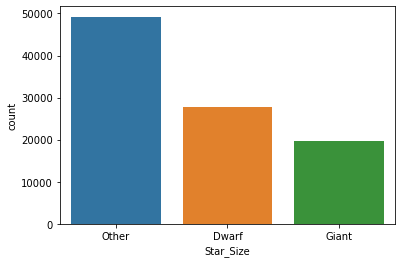

In [74]:
sns.countplot(df.Star_Size)